In [ ]:
# !pip install pymysql
# !pip install pymssql

import LibData
import LibUtils
import LibML
import LibFile

import pandas as pd
import numpy as np


In [ ]:
#for sfs
from mlxtend.feature_selection import SequentialFeatureSelector
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

def Selection(x, y, forward):        
    # 기존 학습
    model = RandomForestRegressor(n_estimators=700, min_samples_leaf=2)

    # model = XGBRegressor(max_delta_step=0.0, objective = 'reg:squarederror', nthread=-1,
    #                      n_estimators = 100,
    #                      colsample_bytree=0.9168,
    #                      learning_rate=0.1284,
    #                      max_depth=7,
    #                      min_child_weight=5,
    #                      subsample=0.4541)

    sfs = SequentialFeatureSelector(model,
                                    k_features=25, 
                                    forward=forward, # if forward = True then SFS otherwise SBS
                                    floating=True, 
                                    verbose=2,
                                    scoring='neg_mean_absolute_error',
                                    n_jobs=4
                                    #cv=5
                                    )

    #after applying sfs fit the data:
    # DataFrame 객체는 안됨. 넘파이객체만 됨
    sfs.fit(x.to_numpy(), y['pv_claim'].to_numpy())


    return sfs

In [ ]:
jobName = '201216_Train_split1'

model = RandomForestRegressor(n_estimators = 700, min_samples_leaf = 2)

x, y = LibData.GetXYBase(jobName)
x = LibData.GetMoneyness(x)
x = LibData.GetAttainedAge(x)
x = LibEE.GetX_Inter_EM_AA(x)
x = LibEE.GetXEmbApplied(3, x, y, ['ProdCode', 'Inter_EM_AA'])
scaler, x = LibUtils.ScaleStandard(x)

x = x.sample(3000)
y = y.iloc[x.index]

In [ ]:
sffs = Selection(xBase, yBase, True)
print(sffs.k_feature_names_)
sfbs = Selection(xBase, yBase, False)
print(sfbs.k_feature_names_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed: 41.0min finished

[2021-01-02 22:48:13] Features: 1/25 -- score: -657.1254482410309[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  34 out of  34 | elapsed: 47.0min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  3.7min finished

[2021-01-02 23:38:57] Features: 2/25 -- score: -583.3543137708078[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 out of  33 | elapsed: 95.6min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:  4.3min finished

[2021-01-03 01:18:51] Features: 3/25 -- score: -476.34797311737356[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[

In [ ]:
import matplotlib.pyplot as plt

print(sfs.k_feature_names_)
# to get the final set of features
#our sfs part has done here
#now towards results

# graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
#fig = plot_sfs(sfs.get_metric_dict())
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
def GetSelectedFeatures(x, sfs):
    cols = pd.DataFrame({ 'idx': range(len(x.columns)), 'colName': x.columns })
    selectedColIdxs = pd.DataFrame(sfs.subsets_[colCnt]['feature_idx'], columns=['idx'])
    selectedColIdxs = pd.merge(selectedColIdxs, cols, on='idx', how='left')
    del selectedColIdxs['idx']
    return selectedColIdxs['colName'].to_numpy()

def GetSelectedFeatures(x, sfs, colCnt):
    cols = pd.DataFrame({ 'idx': range(len(x.columns)), 'colName': x.columns })
    selectedColIdxs = pd.DataFrame(sfs.subsets_[colCnt]['feature_idx'], columns=['idx'])
    selectedColIdxs = pd.merge(selectedColIdxs, cols, on='idx', how='left')
    del selectedColIdxs['idx']
    return selectedColIdxs['colName'].to_numpy()

def GetSelectedFeatures2(xBase colCnt):
    if colCnt ==25: return np.array(xBase.columns)[[0,1,2,3,4,5,6,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,31]] 
    if colCnt ==26: return np.array(xBase.columns)[[0,1,2,3,4,5,6,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,31,33]]
    if colCnt ==27: return np.array(xBase.columns)[[0,1,2,3,4,5,6,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,31,33]]
    if colCnt ==28: return np.array(xBase.columns)[[0,1,2,3,4,5,6,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,33]]
    if colCnt ==29: return np.array(xBase.columns)[[0,1,2,3,4,5,6,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,33]]
    if colCnt ==30: return np.array(xBase.columns)[[0,1,2,3,4,5,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,33]]
    if colCnt ==31: return np.array(xBase.columns)[[0,1,2,3,4,5,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33]]
    if colCnt ==32: return np.array(xBase.columns)[[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33]]
    if colCnt ==33: return np.array(xBase.columns)[[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33,34]]
    if colCnt ==34: return np.array(xBase.columns)[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33,34]]
    if colCnt ==35: return np.array(xBase.columns)[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]]


In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

for i in arange(28,36):
    x_subset = xBase[GetSelectedFeatures2(xBase, i)]
    #x_subset = xBase[GetSelectedFeatures(x, sfs, i)]
    model2 = RandomForestRegressor(n_estimators = 1000, min_samples_leaf = 1, max_features=min(30, i))
    print(LibML.GetPred(x_subset, yBase, model2, 2))


NameError: name 'RandomForestRegressor' is not defined

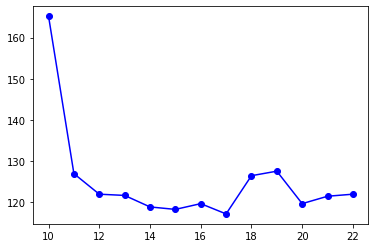

In [6]:
# 그래프 결과
import matplotlib.pyplot as plt

x = [10,11,12,13,14,15,16,17,18,19,20,21,22]
y = [165.2,126.9,121.9,121.6,118.8,118.2,119.6,117.1,126.4,127.5,119.6,121.4,121.9]

plt.plot(x, y, '-ob')
